**Nasyawa Ramadhia // 2141720011**

Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

Anda diperbolehkan melakukan eksplorasi terhadap,
- Metode pra pengolahan
- Pemilihan fitur
- Arsitektur ANN
- Fungsi Aktiviasi

ANN diimplementasikan dengan menggunakan tensorflow.

**Impor Library**

impor pandas, untuk manipulasi dan analisis data

impor numpy, untuk komputasi numerik

impor matplotlib,untuk visualisasi data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Dataset MNIST**

In [ ]:
from sklearn.datasets import fetch_openml

# Memuat dataset MNIST
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Split Data
X = mnist.data
y = mnist.target.astype(int)

In [ ]:
# Train split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Scalling fitur
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Membuat modell ann
from keras.api._v2.keras.layers import Dense
import tensorflow as tf
ann = tf.keras.models.Sequential()
# Membuat input layer
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
# Membuat output layer
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
# Compiling model
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Memasukkan data yang telah di train ke dalam model
ann.fit(X_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10
560/560 [==============================] - 6s 9ms/step - loss: 0.2509 - accuracy: 0.9291
Epoch 2/10
560/560 [==============================] - 5s 9ms/step - loss: 0.0965 - accuracy: 0.9717
Epoch 3/10
560/560 [==============================] - 5s 10ms/step - loss: 0.0622 - accuracy: 0.9818
Epoch 4/10
560/560 [==============================] - 7s 12ms/step - loss: 0.0433 - accuracy: 0.9882
Epoch 5/10
560/560 [==============================] - 7s 12ms/step - loss: 0.0312 - accuracy: 0.9913
Epoch 6/10
560/560 [==============================] - 7s 13ms/step - loss: 0.0236 - accuracy: 0.9925
Epoch 7/10
560/560 [==============================] - 5s 10ms/step - loss: 0.0168 - accuracy: 0.9954
Epoch 8/10
560/560 [==============================] - 7s 13ms/step - loss: 0.0124 - accuracy: 0.9966
Epoch 9/10
560/560 [==============================] - 5s 8ms/step - loss: 0.0164 - accuracy: 0.9954
Epoch 10/10
560/560 [==============================] - 3s 6ms/step - loss: 0.0179 - accuracy: 

In [ ]:
# Perhitungan akurasi model
loss, accuracy  = ann.evaluate(X_test, y_test, verbose=False)
print(f'Akurasi : {accuracy}')

Akurasi : 0.9697142839431763


1/1 [==============================] - 0s 21ms/step


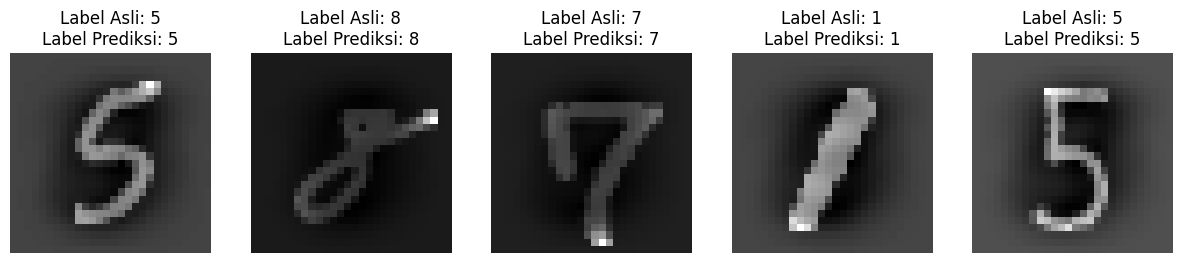

In [ ]:
# Penampilan data
num_samples = 5  # Ganti jumlah contoh yang ingin ditampilkan sesuai kebutuhan

fig, axs = plt.subplots(1, num_samples, figsize=(15, 4))

for i in range(num_samples):
    sample_index = np.random.randint(len(X_test))
    sample_image = X_test[sample_index]
    true_label = y_test[sample_index]

    # Prediksi dengan model yang telah disiapkan (model neural network)
    prediction = ann.predict(np.array([sample_image]))

    # Label prediksi adalah indeks dengan nilai maksimum dari output
    predicted_label = np.argmax(prediction)

    # Menampilkan citra pengujian dan hasil prediksi
    axs[i].imshow(np.reshape(sample_image, (28, 28)), cmap='gray')
    axs[i].set_title(f"Label Asli: {true_label}\nLabel Prediksi: {predicted_label}")
    axs[i].axis('off')

plt.show()